# Exersice 1
We are going to work on linear regression
initially we will work on 2d points and then expand it out to 3d.

In [1]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Generate 'random' data
np.random.seed(0)
x = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * x + res                  # Actual values of Y


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


INFO - 2022-03-07 15:36:35,335 - utils - NumExpr defaulting to 8 threads.


We can use Linear regression from the *sklearn* package.
Here we setup the model to fit to x and y.

In [2]:
x_r = x.reshape(-1,1) #fit needs x in this shape
# Initialise and fit model
lm = LinearRegression()
model = lm.fit(x_r, y)


We can now predict new outcomes given new data.

In [3]:
# Draw a new datapoint
tst_x = 2.5 * np.random.randn(1).reshape(-1,1) + 1.5   
print(tst_x)
resulting_y = model.predict(tst_x)
print(resulting_y)

[[0.57704541]]
[2.18951787]


Drawing 200 new samples and plotting them as a line shows us that we have gotten a decent fit.

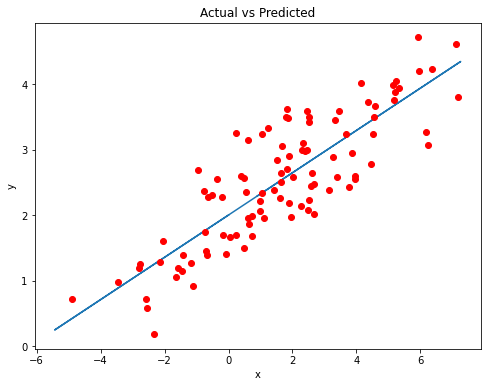

In [4]:
new_x = 2.5 * np.random.randn(200).reshape(-1,1) + 1.5   
predicted = model.predict(new_x)
plt.figure(figsize=(8, 6))
plt.plot(new_x, predicted)     # regression line
plt.plot(x, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exercises
### A
Using Ordinary Least squares attempt to get a regression line that is equal to the one sklearn provides.

Assuming
Yₑ = α + β X

![ols.gif](ols.gif "ols")

- β = Cov(X, Y) / Var(X).
- α = mean(Y)-β*mean(X)

### B
Extend what we have shown above to 3D predict a plane using Linear regression given a point cloud.

Planes can be plotted with 
```{Python}
x = np.linspace(start, end, n)
y = np.linspace(start, end, n)
xx, yy = np.meshgrid(x_t, y_t)

ax.plot_surface(xx, yy, predicted_zz, alpha=0.2)
```

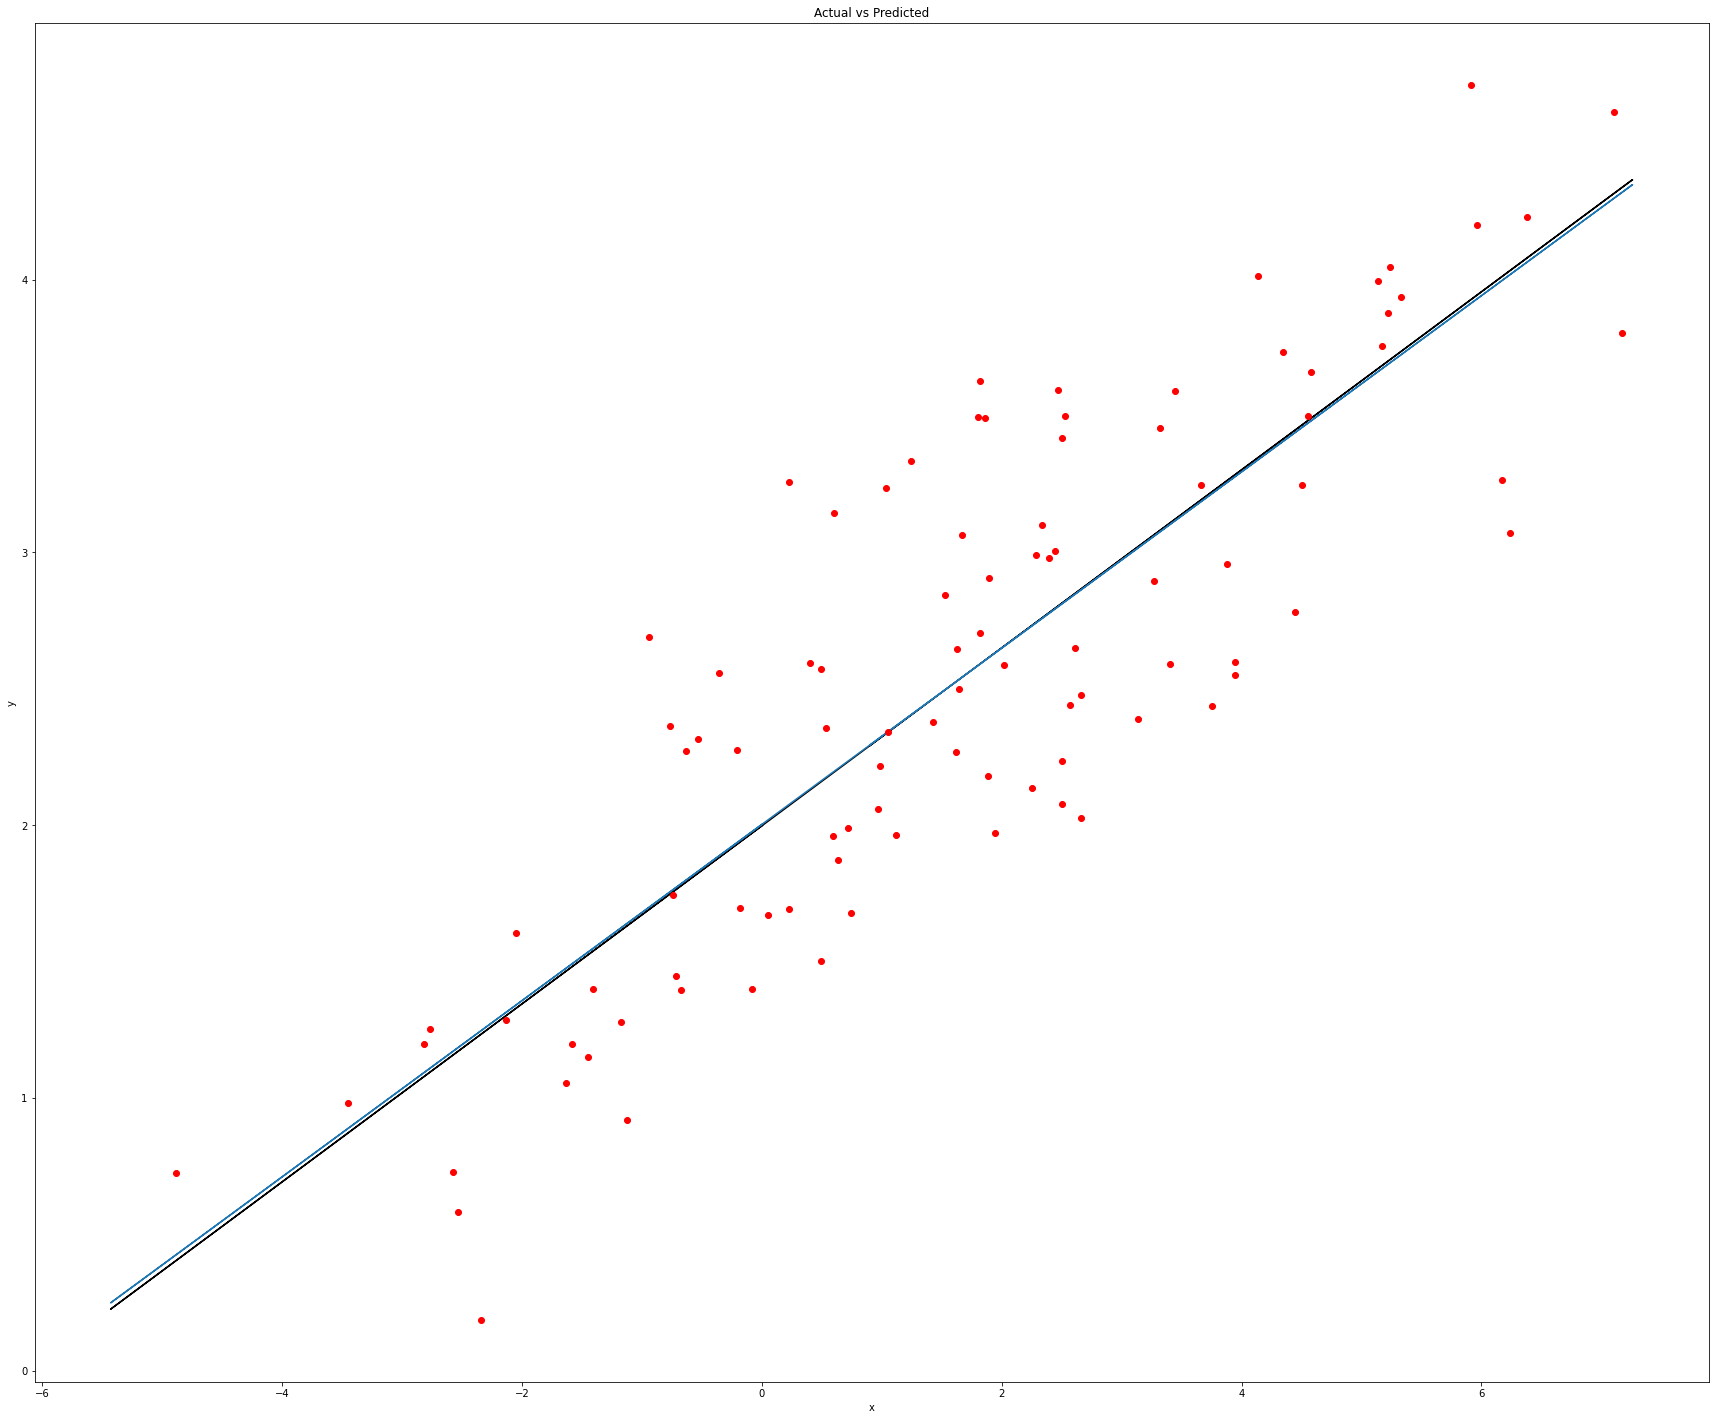

In [5]:
def covariance(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

def variance(data):
    # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / n
    return variance

beta = covariance(x,y)/variance(x)
alpha = np.mean(y) - beta*np.mean(x)
y_e = alpha + beta*(new_x)


plt.figure(figsize=(30, 25))
plt.plot(new_x, y_e, 'k')     # regression line
plt.plot(new_x, predicted)     # regression line
plt.plot(x, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

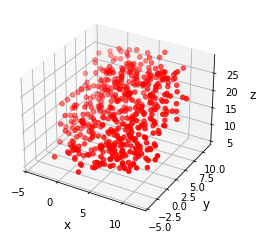

In [6]:
# Creating a pointcloud.
pc = o3d.io.read_point_cloud("TestData/spread_points.ply")
xyz = np.asarray(pc.points)

fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.scatter3D(xyz[:,0], xyz[:,1], xyz[:,2], color = 'red')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
plt.show()


In [7]:
## We want to predict Z
xy = xyz[:,:2] # our inputs
z = xyz[:,2].reshape(-1,1) # our targets


lm = LinearRegression()
model = lm.fit(xy, z)

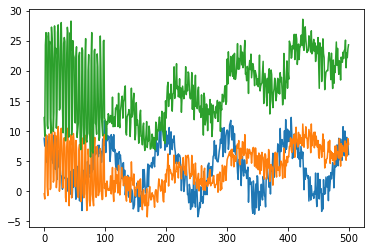

In [8]:
plt.figure()
plt.plot(xy)
plt.plot(z)

In [27]:
start = 0
end = 10
n = 10
x_new = np.linspace(start, end, n)
y_new = np.linspace(start, end, n)
#xx, yy = np.meshgrid(x, y)
xy_new = np.concatenate((np.asarray(x_new),np.asarray(y_new)),axis=0)

print(xy_new)
print(xy[0])
predicted = model.predict(xy_new)
plt.figure(figsize=(8, 6))
plt.plot(new_x, predicted)     # regression line
plt.plot(x, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.          0.          1.11111111
  2.22222222  3.33333333  4.44444444  5.55555556  6.66666667  7.77777778
  8.88888889 10.        ]
[ 8.8041197  -0.41144829]


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.          0.          1.11111111
  2.22222222  3.33333333  4.44444444  5.55555556  6.66666667  7.77777778
  8.88888889 10.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

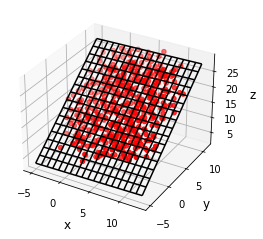

In [28]:
pc = o3d.io.read_point_cloud("TestData/spread_points.ply")
xyz = np.asarray(pc.points)
x, y, z = xyz[:,0], xyz[:,1], xyz[:,2]

fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z , color = 'red')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)


tmp_A = []
tmp_b = []
for x_s,y_s,z_s in zip(x,y,z):
    tmp_A.append([x_s, y_s, 1])
    tmp_b.append(z_s)
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)

# Manual solution
# https://en.wikipedia.org/wiki/Overdetermined_system
fit = (A.T * A).I * A.T * b

# plot plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]), np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
        
ax.plot_wireframe(X,Y,Z, color='k')
plt.show()

In [68]:
start = 0
end = 500
n = 500
x = np.linspace(start, end, n)
y = np.linspace(start, end, n)
z = np.linspace(start, end, n)
xx, yy = np.meshgrid(x, y, z)

#plt.plot(xx)
ax.plot_surface(xx, yy, alpha=0.2)

KeyboardInterrupt: 